In [2]:
# HIDDEN
from datascience import *
from prob140 import *
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
%matplotlib inline
import math
from scipy import stats
from scipy import misc

### Reversibility ###
The reflecting random walk of the last section has states 0, 1, 2, 3, 4 arranged in sequence clockwise on a circle; at each step the chain moves to its clockwise neighbor with probability $p \in (0, 1)$ and to its counterclockwise neighbor with probability $q = 1-p$. The stationary distribution of the chain assigns chance 0.2 to each state.

If $p > 1/2$, then the chain is more likely to be moving clockwise than counterclockwise. For example, in steady state, the probability of the path $0, 1, 2, 3$ is

$$
P_0(0)P(0, 1)P(1, 2)P(2, 3) = 0.2p^3
$$

The probability of the *reversed* path $3, 2, 1, 0$ is

$$
P_0(3)P(3, 2)P(2, 1)P(1, 0) = 0.2q^3
$$

If $p > 1/2$, the original path has higher chance.

But if $p = 1/2$, the chance of the original path is the same as that of the reversed path; in steady state, the chain is just as likely to be running in either direction. If someone simulates the chain in steady state and shows you the original path as well as the reversed path, you will not be able to tell which is which.

In this section we define what it means for a Markov Chain to be *reversible* in this way.

### Reversed Process ###
Let $X_0, X_1, \ldots $ be an irreducible Markov Chain with a finite state space and stationary distribution $\pi$. Start the chain off with this stationary distribution; that is, let $X_0$ have distribution $\pi$. Then for all $n \ge 1$, the distribution of $X_n$ is also $\pi$.

Fix $n > 0$ and consider the *reversed* sequence $Y_0, Y_1, \ldots, Y_n$ defined by $Y_k = X_{n-k}$ for $k = 0, 1, \ldots, n$.

It is a wonderful fact that the reversed sequence is a Markov Chain. To see why, we will check that the Markov property holds.

Fix states $i$ and $j$ and an integer $m$ in the range 0 through $n-1$.

\begin{align*}
& P(Y_{m+1} = j \mid Y_0 = i_0, Y_1 = i_1, \ldots, Y_{m-1} = i_{m-1}, Y_m = i) \\ \\ 
&=
\frac{P(Y_0 = i_0, Y_1 = i_1 \ldots, Y_{m-1} = i_{m-1}, Y_m = i, Y_{m+1} = j)}
{P(Y_0 = i_0, Y_1 = i_1 \ldots, Y_{m-1} = i_{m-1}, Y_m = i)} \\ \\
&= \frac{P(X_n = i_0, X_{n-1} = i_1, \ldots, X_{n-m+1} = i_{m-1}, X_{n-m} = i, X_{n-m-1} = j)}
{P(X_n = i_0, X_{n-1} = i_1, \ldots, X_{n-m+1} = i_{n-m+1}, X_{n-m} = i)} \\ \\
&= \frac{\pi(j)P(j, i)P(i, i_{m-1}) \cdots P(i_1, i_0)}
{\pi(i)P(i, i_{m-1}) \cdots P(i_1, i_0)} \\ \\
&= \frac{\pi(j)P(j, i)}{\pi(i)}
\end{align*}

This involves only $i$ and $j$, and not on $i_0, i_1, \ldots, i_{m-1}$ nor on $m$. So the Markov property is satisfied and the transition probabilities are time homogenous. The one-step "$i$ to $j$" transition probability for the reversed sequence is

$$
P(Y_{m+1} = j \mid Y_m = i) = \frac{\pi(j)P(j, i)}{\pi(i)}
$$

### Reversible Chains ###
The original "forwards" Markov Chain $X_0, X_1, \ldots $ is called *reversible* if for every $n$, the reversed sequence $Y_0, Y_1, \ldots Y_n$
has *the same one-step transition probabilities as the original*; that is, if

$$
\frac{\pi(j)P(j, i)}{\pi(i)} = P(i, j) ~~~ \text{for all } i, j
$$

That is, the chain is reversible if

$$
\pi(i)P(i, j) = \pi(j)P(j, i) ~~~ \text{for all } i, j
$$

In other words:

**The chain is reversible if the detailed balance equations have a positive solution.** This is consistent with our image of particles moving according to this chain in steady state: at each instant, the proportion of particles moving from $i$ to $j$ is exactly the same as the proportion moving from $j$ to $i$, for every pair of states $i$ and $j$. 

At the start of this section we looked at a random walk on a circle. Let's see what the definition of reversibility implies for this chain.

- In the previous section we showed that when $p \ne 1/2$, the detailed balance equations have no positive solution. Therefore, when $p \ne 1/2$, the chain is not reversible. This is consistent with our earlier analysis.

- When $p = 1/2$, the detailed balance equations do have a solution, and therefore the chain is reversible. This formalizes our idea that if $p = 1/2$ then in steady state the chain "looks the same run forwards or backwards."

### Reversibility of Birth and Death Chains ###
Recall that a *birth and death chain* is a Markov Chain on the integers, with one-step transitions restricted to going up by 1, going down by 1, or staying in place. It is not hard to check that every irreducible birth and death chain with a finite state space is reversible. You can simply solve the detailed balance equations just as we did for the Ehrenfest chain in the previous section.

Go back and look through the examples in the text and exercises. The switching chains, the reflecting random walks (both lazy and not), both of the Ehrenfest chains, and the Bernoulli-Laplace chain are all irreducible birth and death chains, and hence are reversible.

Let's confirm this in the case of a birth and death chain which at first glance seems not to be reversible. Here is the transition diagram of a Markov Chain $X_0, X_1, \ldots $.

![B&D](trans_b_and_d.png)

This chain moves right (that is, has births) with high probability, so it seems as though we should be able to tell whether it's moving forwards or backwards. But remember that **time reversal happens in the steady state**. In the steady state, the chain is overwhelmingly likely to be shuttling between states 3 and 4. You can see this by solving the detailed balance equations.

\begin{align*}
\pi(1)\cdot 1 &= \pi(2) \cdot 0.1 ~~~~ \implies \pi(2) = 10\pi(1)  \\
\pi(2) \cdot 0.9 &= \pi(3) \cdot 0.1 ~~~~ \implies \pi(3) = 90\pi(1) \\
\pi(3) \cdot 0.9 &= \pi(4) \cdot 1 ~~~~~~~ \implies \pi(4) = 81\pi(1)
\end{align*}

It will visit states 2 and 1 as well, but rarely, state 1 being particularly rare. These vists will intersperse the sojourns in 3 and 4, and the paths will be indistinguishable forwards and backwards.

Let's simulate paths of this process. First, we construct the transition matrix and confirm our calculations of $\pi$.

In [3]:
s = np.arange(1, 5)

def trans(i, j):
    if i == 1:
        if j == 2:
            return 1
        else:
            return 0
    elif i == 4:
        if j == 3:
            return 1
        else:
            return 0
    elif j == i+1:
        return 0.9
    elif j == i-1:
        return 0.1
    else:
        return 0

bnd = Table().states(s).transition_function(trans).toMarkovChain()

In [7]:
pi = bnd.steady_state()
pi

State,Probability
1,0.00549451
2,0.0549451
3,0.494505
4,0.445055


In [53]:
0.445055/0.00549451

80.99994358004626

The method `simulate_chain` simulates a path of the chain. Its arguments are the initial distribution (provided as a distribution object) and the number of steps.

The graph below shows one path of length 200. Run the cell a few times and look at each path forwards as well as backwards. You won't find a systematic difference between the two. 

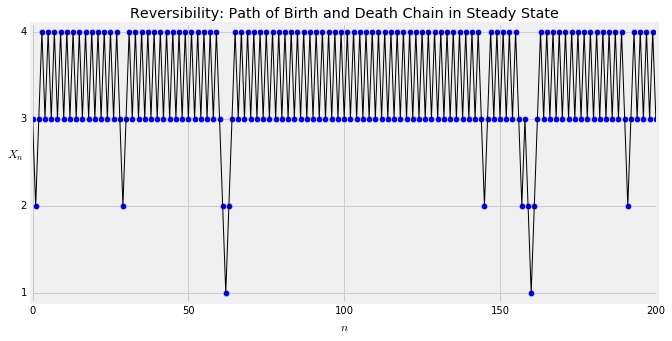

In [68]:
plt.figure(figsize=(10,5))
n = 200                          # the number of steps
x = np.arange(n+1)               # the steps
y = bnd.simulate_chain(pi, n)    # the simulated state at each step
plt.scatter(x, y, s=40)          # a point at the state at each step
plt.plot(x, y, lw=1, color='k')  # lines join the points, as a visual aid

# The rest of the code sets axis limits, styles, and labels.
plt.xlim(-0.5, n+0.5)
plt.ylim(0.9, 4.1)
plt.yticks(np.arange(1, 5))
plt.xlabel('$n$')
plt.ylabel('$X_n$', rotation=0)
plt.title('Reversibility: Path of Birth and Death Chain in Steady State');